# Task 2: Credit Risk Prediction

## Loan Prediction Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 1. Load Dataset
# Ensure 'loan_dataset_20000.csv' is in your working directory
df = pd.read_csv('loan_dataset_20000.csv')

In [3]:
# 2. Exploratory Data Analysis (Visualization)
sns.set(style="whitegrid")

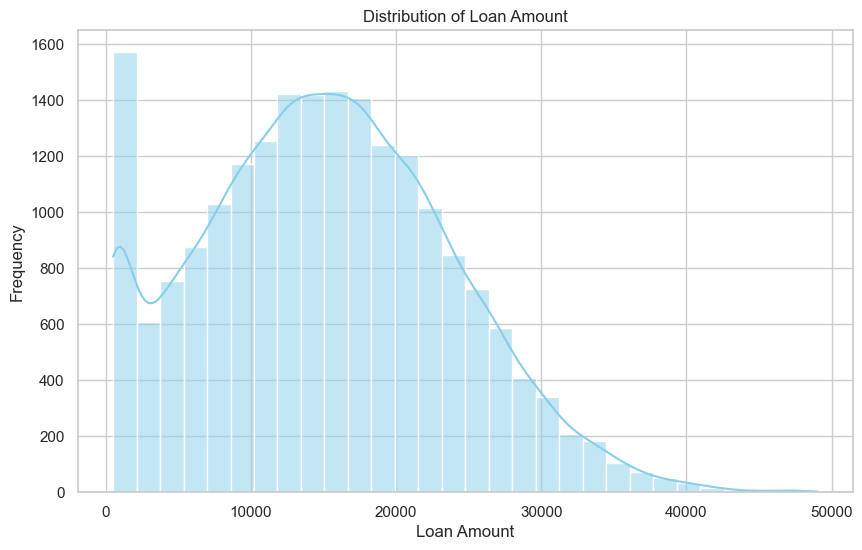

In [4]:
# Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12812\1962078311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education_level', data=df, order=df['education_level'].value_counts().index, palette='viridis')


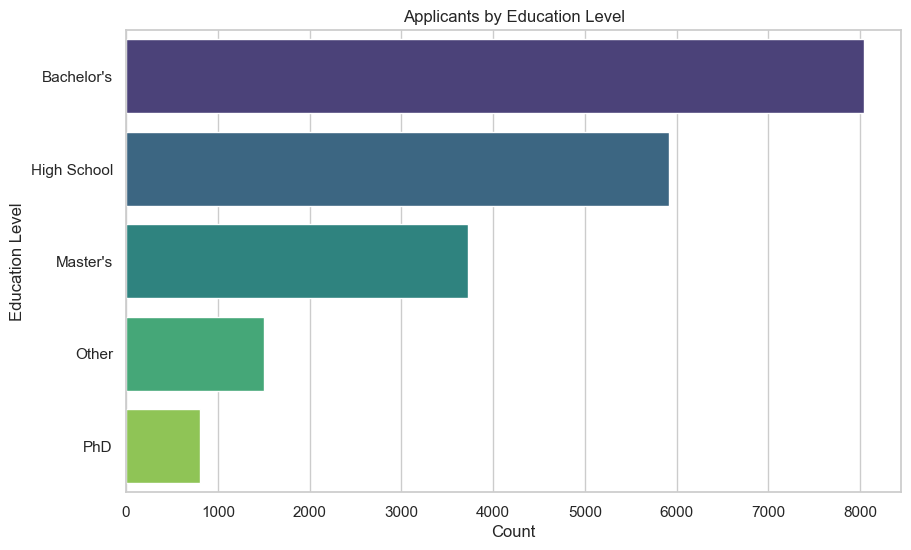

In [5]:
# Education Level Counts
plt.figure(figsize=(10, 6))
sns.countplot(y='education_level', data=df, order=df['education_level'].value_counts().index, palette='viridis')
plt.title('Applicants by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

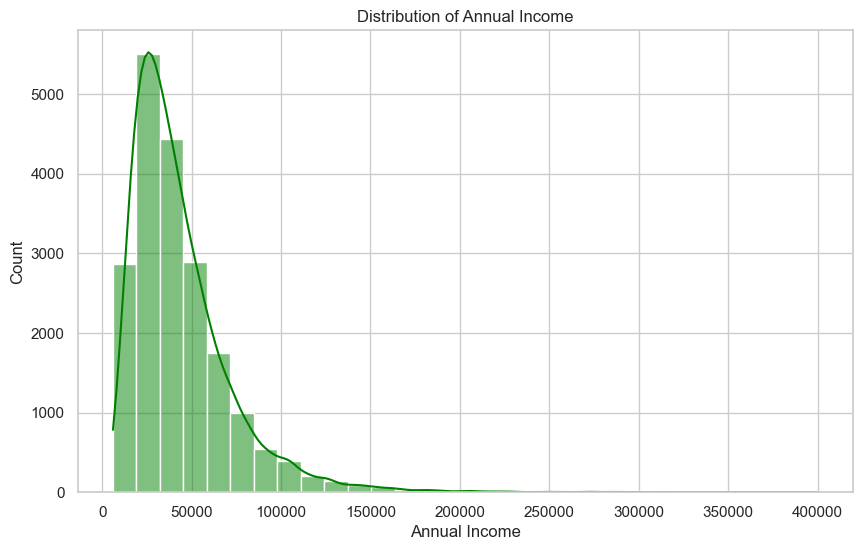

In [6]:
# Annual Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_income'], kde=True, bins=30, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()

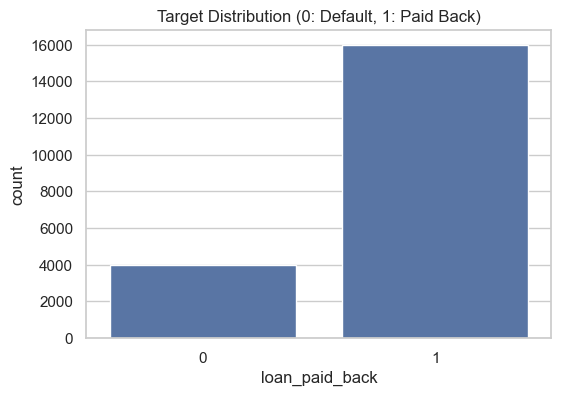

In [7]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_paid_back', data=df)
plt.title('Target Distribution (0: Default, 1: Paid Back)')
plt.show()

In [8]:
# 3. Data Preprocessing
# Split features and target
X = df.drop('loan_paid_back', axis=1)
y = df['loan_paid_back']

# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
# Numerical: Impute missing values with median, then scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: Impute missing values with most frequent, then One-Hot Encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])


In [9]:
# 4. Model Training (Logistic Regression)
# Create a full pipeline with the preprocessor and the classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'annual_income', 'monthly_income', 'debt_to_income_ratio',
       'credit_score', 'loan_amount', 'interest_rate', 'loan_term',
       'installment', 'num_of_open_accounts', 'total_credit_limit',
       'cur...
       'num_of_delinquencies'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# 5. Evaluation
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.8805

Confusion Matrix:
 [[ 461  357]
 [ 121 3061]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.66       818
           1       0.90      0.96      0.93      3182

    accuracy                           0.88      4000
   macro avg       0.84      0.76      0.79      4000
weighted avg       0.87      0.88      0.87      4000



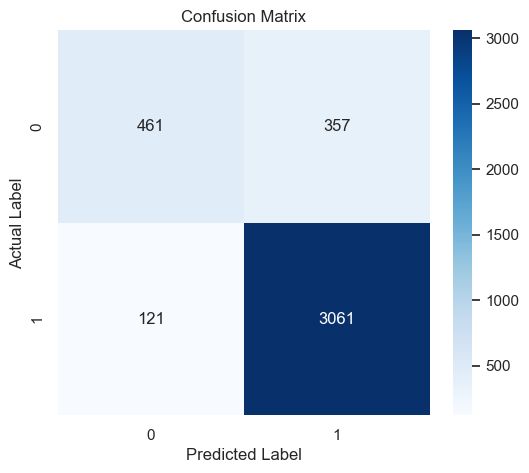

In [11]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()